**Distance based adaptive confidence threshold inference optimization**

Setup environment

In [1]:
import os
!pip install nuscenes-devkit tensorboardX timm efficientnet_pytorch lyft-dataset-sdk
!rm -rf /data/sets/nuscenes/mini/*
!mkdir -p /data/sets/nuscenes/mini

%cd /data/sets/nuscenes/mini
!wget -O v1.0-mini.tgz https://www.nuscenes.org/data/v1.0-mini.tgz

!tar -xf v1.0-mini.tgz

import os
if os.path.exists("/data/sets/nuscenes/mini/maps"):
    print("SUCCESS")
else:
    print("ERROR")

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.4/86.4 kB 7.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of opencv-python-headless to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.0/316.0 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 125.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 MB 48.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 111.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━

/data/sets/nuscenes/mini
--2025-12-16 16:49:40--  https://www.nuscenes.org/data/v1.0-mini.tgz
Resolving www.nuscenes.org (www.nuscenes.org)... 13.32.205.98, 13.32.205.38, 13.32.205.100, ...
Connecting to www.nuscenes.org (www.nuscenes.org)|13.32.205.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4167696325 (3.9G) [application/x-tar]
Saving to: ‘v1.0-mini.tgz’

v1.0-mini.tgz       100%[===================>]   3.88G   223MB/s    in 17s     

2025-12-16 16:49:57 (232 MB/s) - ‘v1.0-mini.tgz’ saved [4167696325/4167696325]

SUCCESS


In [2]:
%cd /content

!git clone https://github.com/aharley/simple_bev.git

%cd simple_bev

!sh get_rgb_model.sh
!sh get_rad_model.sh

!ls checkpoints/

/content
Cloning into 'simple_bev'...
remote: Enumerating objects: 375, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 375 (delta 42), reused 45 (delta 41), pack-reused 326 (from 1)
Receiving objects: 100% (375/375), 144.00 KiB | 2.36 MiB/s, done.
Resolving deltas: 100% (224/224), done.
/content/simple_bev
downloading rgb model from dropbox...
--2025-12-16 16:50:42--  https://www.dropbox.com/s/n93ryvrqyiram56/rgb_checkpoint.tar.gz
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/k4pk5szq7i0gul2aqylb1/rgb_checkpoint.tar.gz?rlkey=6fmruxvsvh6nij3lfuyjn51ub [following]
--2025-12-16 16:50:43--  https://www.dropbox.com/scl/fi/k4pk5szq7i0gul2aqylb1/rgb_checkpoint.tar.gz?rlkey=6fmruxvsvh6nij3lfuyjn51ub
Reusing existing con

In [3]:
import os
import gdown
import shutil

maps_dir = "/data/sets/nuscenes/mini/maps"
expansion_dir = os.path.join(maps_dir, "expansion")
os.makedirs(maps_dir, exist_ok=True)

file_id = '1DRbeJ1OboL37W7Dl4eBbCTzvC-Uk1oLf'
url = f'https://drive.google.com/uc?id={file_id}'
output_zip = os.path.join(maps_dir, "nuScenes-map-expansion-v1.3.zip")

gdown.download(url, output_zip, quiet=False)

if os.path.exists(output_zip):
    !unzip -o "$output_zip" -d "$maps_dir"

    os.makedirs(expansion_dir, exist_ok=True)

    required_maps = [
        "singapore-onenorth.json",
        "boston-seaport.json",
        "singapore-hollandvillage.json",
        "singapore-queenstown.json"
    ]

    moved_count = 0
    for map_name in required_maps:
        src = os.path.join(maps_dir, map_name)
        dst = os.path.join(expansion_dir, map_name)

        if os.path.exists(src):
            shutil.move(src, dst)
            moved_count += 1
        elif os.path.exists(dst):
            moved_count += 1

    print(f"\nMaps downloaded! .")
    !ls -lh "$expansion_dir"
else:
    print("Error: map downloading failed")

Downloading...
From (original): https://drive.google.com/uc?id=1DRbeJ1OboL37W7Dl4eBbCTzvC-Uk1oLf
From (redirected): https://drive.google.com/uc?id=1DRbeJ1OboL37W7Dl4eBbCTzvC-Uk1oLf&confirm=t&uuid=6784a8fd-a591-457d-b692-a626ca76fafa
To: /data/sets/nuscenes/mini/maps/nuScenes-map-expansion-v1.3.zip
100%|██████████| 399M/399M [00:03<00:00, 104MB/s]


Archive:  /data/sets/nuscenes/mini/maps/nuScenes-map-expansion-v1.3.zip
   creating: /data/sets/nuscenes/mini/maps/basemap/
  inflating: /data/sets/nuscenes/mini/maps/basemap/boston-seaport.png  
  inflating: /data/sets/nuscenes/mini/maps/basemap/singapore-hollandvillage.png  
  inflating: /data/sets/nuscenes/mini/maps/basemap/singapore-queenstown.png  
  inflating: /data/sets/nuscenes/mini/maps/basemap/singapore-onenorth.png  
   creating: /data/sets/nuscenes/mini/maps/expansion/
  inflating: /data/sets/nuscenes/mini/maps/expansion/boston-seaport.json  
  inflating: /data/sets/nuscenes/mini/maps/expansion/singapore-onenorth.json  
  inflating: /data/sets/nuscenes/mini/maps/expansion/singapore-queenstown.json  
  inflating: /data/sets/nuscenes/mini/maps/expansion/singapore-hollandvillage.json  
   creating: /data/sets/nuscenes/mini/maps/prediction/
  inflating: /data/sets/nuscenes/mini/maps/prediction/prediction_scenes.json  
  inflating: /data/sets/nuscenes/mini/maps/LICENSE  

Maps d

Create threshold optimization code  (code_adaptive_optimized.py) by running cell below

In [4]:
%cd /content/simple_bev

code_adaptive_optimized = """
import os
import time
import argparse
import numpy as np
import saverloader
from fire import Fire
from nets.segnet import Segnet
import utils.misc
import utils.improc
import utils.vox
import random
import nuscenesdataset
import torch
torch.multiprocessing.set_sharing_strategy('file_system')
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

# Asetukset
scene_centroid = torch.tensor([0.0, 1.0, 0.0]).reshape([1, 3]).float()
bounds = (-50, 50, -5, 5, -50, 50)
Z, Y, X = 200, 8, 200

# KORJATTU ETÄISYYSKALA (Sama kuin baseline)
max_dist = np.sqrt(50**2 + 50**2)
num_bins = 10
bin_size = max_dist/num_bins

def run_model(model, d, device='cuda:0'):
    metrics = {}

    imgs, rots, trans, intrins, pts0, extra0, pts, extra, lrtlist_velo, vislist, tidlist, scorelist, seg_bev_g, valid_bev_g, center_bev_g, offset_bev_g, radar_data, egopose = d

    imgs = imgs[:,0].float().to(device) - 0.5
    seg_bev_g = seg_bev_g[:,0].to(device)
    valid_bev_g = valid_bev_g[:,0].to(device)

    B = imgs.shape[0]

    rots, trans, intrins = rots[:,0], trans[:,0], intrins[:,0]
    __p = lambda x: utils.basic.pack_seqdim(x, B)
    __u = lambda x: utils.basic.unpack_seqdim(x, B)
    intrins_ = __p(intrins)
    pix_T_cams_ = utils.geom.merge_intrinsics(*utils.geom.split_intrinsics(intrins_)).to(device)
    pix_T_cams = __u(pix_T_cams_)
    velo_T_cams = utils.geom.merge_rtlist(rots, trans).to(device)
    cam0_T_camXs = utils.geom.get_camM_T_camXs(velo_T_cams, ind=0)

    vox_util = utils.vox.Vox_util(Z, Y, X, scene_centroid=scene_centroid.to(device), bounds=bounds, assert_cube=False)

    rad_occ_mem0 = None
    if model.module.use_radar:
        radar_data = radar_data[:,0]
        rad_data = radar_data.to(device).permute(0, 2, 1)
        xyz_rad = rad_data[:,:,:3]
        meta_rad = rad_data[:,:,3:]
        cams_T_velo = __u(utils.geom.safe_inverse(__p(velo_T_cams)))
        rad_xyz_cam0 = utils.geom.apply_4x4(cams_T_velo[:,0], xyz_rad)
        rad_occ_mem0 = vox_util.voxelize_xyz_and_feats(rad_xyz_cam0, meta_rad, Z, Y, X, assert_cube=False)

    _, _, seg_bev_e, _, _ = model(
            rgb_camXs=imgs,
            pix_T_cams=pix_T_cams,
            cam0_T_camXs=cam0_T_camXs,
            vox_util=vox_util,
            rad_occ_mem0=rad_occ_mem0)

    # --- POST-PROCESSING: ULTIMATE SMOOTH GRADIENT ---

    # 1. Etäisyyskartta
    coords_mem = utils.basic.gridcloud3d(B,Z,1,X)
    coords_cam = vox_util.Mem2Ref(coords_mem, Z, Y, X)
    dists_cam = torch.norm(coords_cam, dim=2)
    dist_map = dists_cam.reshape(1, 1, Z, X).to(device)

    # 2. Threshold-logiikka
    thresholds = torch.ones_like(seg_bev_e) * 0.50

    # ZONE 1: Lähialue (0-10m) -> Kiinteä 0.60
    mask_near = dist_map <= 10.0
    thresholds[mask_near] = 0.60

    # ZONE 2: Keskialue (10-40m) -> Lineaarinen liuku 0.60 -> 0.25
    mask_mid = (dist_map > 10.0) & (dist_map <= 40.0)
    mid_dist_range = dist_map[mask_mid]
    progress = (mid_dist_range - 10.0) / (40.0 - 10.0)
    thresholds[mask_mid] = 0.60 - (progress * (0.60 - 0.25))

    # ZONE 3: Kaukoalue (>40m) -> Kiinteä 0.25
    mask_far = dist_map > 40.0
    thresholds[mask_far] = 0.25

    # 3. Ennustus
    probs = torch.sigmoid(seg_bev_e)
    seg_bev_e_round = (probs > thresholds).float()

    # -----------------------------------------------------

    inter_map = seg_bev_e_round * seg_bev_g * valid_bev_g
    union_map = ((seg_bev_e_round + seg_bev_g) * valid_bev_g).clamp(0,1)

    dist_map_ = dist_map.reshape(-1)
    inter_map_ = inter_map.reshape(-1)
    union_map_ = union_map.reshape(-1)

    inters_ = torch.zeros(num_bins, dtype=torch.float32, device=device)
    unions_ = torch.zeros(num_bins, dtype=torch.float32, device=device)

    for bi in range(num_bins):
        bin_min = bin_size * bi
        bin_max = bin_size * (bi+1)
        inds = (dist_map_ > bin_min) & (dist_map_ < bin_max)
        inters_[bi] = inter_map_[inds].sum()
        unions_[bi] = union_map_[inds].sum()

    metrics['inters_'] = inters_.cpu().numpy()
    metrics['unions_'] = unions_.cpu().numpy()
    metrics['loss'] = torch.tensor(0.0)

    return metrics

def main(
        exp_name='eval_optimized',
        dset='mini',
        data_dir='/data/sets/nuscenes',
        init_dir='',
        use_radar=False,
        batch_size=1,
        device_ids=[0],
):
    device = 'cuda:%d' % device_ids[0]

    final_dim = (int(224 * 2), int(400 * 2))
    data_aug_conf = {
        'crop_offset': 0, 'resize_lim': [1.0, 1.0], 'final_dim': final_dim,
        'H': 900, 'W': 1600,
        'cams': ['CAM_FRONT_LEFT', 'CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_LEFT', 'CAM_BACK', 'CAM_BACK_RIGHT'],
        'ncams': 6,
    }
    _, val_dataloader = nuscenesdataset.compile_data(
        dset, data_dir, data_aug_conf=data_aug_conf,
        centroid=scene_centroid.numpy(), bounds=bounds, res_3d=(Z,Y,X),
        bsz=batch_size, nworkers=2, shuffle=False, seqlen=1, nsweeps=5, get_tids=True
    )
    val_dataloader.dataset.data_root = os.path.join(data_dir, dset)
    val_iterloader = iter(val_dataloader)

    model = Segnet(Z, Y, X, use_radar=use_radar, use_metaradar=use_radar, encoder_type='res101')
    model = model.to(device)
    model = torch.nn.DataParallel(model, device_ids=device_ids)

    if init_dir:
        if os.path.isdir(init_dir):
            files = [f for f in os.listdir(init_dir) if f.endswith('.pth')]
            if files:
                path = os.path.join(init_dir, files[0])
                print(f"Ladataan kansiosta: {path}")
                saverloader.load(path, model.module)
        elif os.path.isfile(init_dir):
            print(f"Ladataan suoraan tiedostosta: {init_dir}")
            checkpoint = torch.load(init_dir, map_location=device)
            if 'model_state_dict' in checkpoint:
                model.module.load_state_dict(checkpoint['model_state_dict'], strict=False)
            else:
                model.module.load_state_dict(checkpoint, strict=False)
        else:
            print(f"VAROITUS: Checkpointia {init_dir} ei löytynyt!")

    model.eval()

    inters_total = np.zeros(num_bins)
    unions_total = np.zeros(num_bins)

    max_iters = len(val_dataloader)
    print(f"eval_optimized; {max_iters} steps")

    for _ in range(max_iters):
        try:
            sample = next(val_iterloader)
        except StopIteration:
            break

        with torch.no_grad():
            metrics = run_model(model, sample, device)

        inters_total += metrics['inters_']
        unions_total += metrics['unions_']

    ious = inters_total / np.maximum(unions_total, 1.0) * 100

    print(f"ious_over_distance {ious}")
    print(f"final mini mean iou {np.mean(ious)}")

    # --- TALLENNUS ---
    save_name = 'results_cam_optimized.npy'
    np.save(save_name, ious)
    print(f"Tulokset tallennettu tiedostoon: {save_name}")

if __name__ == '__main__':
    Fire(main)
"""

with open("eval_over_distance_optimized.py", "w") as f:
    f.write(code_adaptive_optimized)

/content/simple_bev


We need to fix the baseline model to have the same distances and to support radar model by fixing small bug

In [5]:
%cd /content/simple_bev

code_eval_baseline_fixed = """
import os
import time
import argparse
import numpy as np
import saverloader
from fire import Fire
from nets.segnet import Segnet
import utils.misc
import utils.improc
import utils.vox
import random
import nuscenesdataset
import torch
torch.multiprocessing.set_sharing_strategy('file_system')
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

# Asetukset
scene_centroid = torch.tensor([0.0, 1.0, 0.0]).reshape([1, 3]).float()
bounds = (-50, 50, -5, 5, -50, 50)
Z, Y, X = 200, 8, 200

# KORJATTU ETÄISYYSKALA (Baseline)
max_dist = np.sqrt(50**2 + 50**2)
num_bins = 10
bin_size = max_dist/num_bins

def run_model(model, d, device='cuda:0'):
    metrics = {}

    imgs, rots, trans, intrins, pts0, extra0, pts, extra, lrtlist_velo, vislist, tidlist, scorelist, seg_bev_g, valid_bev_g, center_bev_g, offset_bev_g, radar_data, egopose = d

    imgs = imgs[:,0].float().to(device) - 0.5
    seg_bev_g = seg_bev_g[:,0].to(device)
    valid_bev_g = valid_bev_g[:,0].to(device)

    B = imgs.shape[0]

    rots, trans, intrins = rots[:,0], trans[:,0], intrins[:,0]
    __p = lambda x: utils.basic.pack_seqdim(x, B)
    __u = lambda x: utils.basic.unpack_seqdim(x, B)
    intrins_ = __p(intrins)
    pix_T_cams_ = utils.geom.merge_intrinsics(*utils.geom.split_intrinsics(intrins_)).to(device)
    pix_T_cams = __u(pix_T_cams_)
    velo_T_cams = utils.geom.merge_rtlist(rots, trans).to(device)
    cam0_T_camXs = utils.geom.get_camM_T_camXs(velo_T_cams, ind=0)

    vox_util = utils.vox.Vox_util(Z, Y, X, scene_centroid=scene_centroid.to(device), bounds=bounds, assert_cube=False)

    rad_occ_mem0 = None
    if model.module.use_radar:
        radar_data = radar_data[:,0]
        rad_data = radar_data.to(device).permute(0, 2, 1)
        xyz_rad = rad_data[:,:,:3]
        meta_rad = rad_data[:,:,3:]
        cams_T_velo = __u(utils.geom.safe_inverse(__p(velo_T_cams)))
        rad_xyz_cam0 = utils.geom.apply_4x4(cams_T_velo[:,0], xyz_rad)
        rad_occ_mem0 = vox_util.voxelize_xyz_and_feats(rad_xyz_cam0, meta_rad, Z, Y, X, assert_cube=False)

    _, _, seg_bev_e, _, _ = model(
            rgb_camXs=imgs,
            pix_T_cams=pix_T_cams,
            cam0_T_camXs=cam0_T_camXs,
            vox_util=vox_util,
            rad_occ_mem0=rad_occ_mem0)

    # --- ORIGINAL BASELINE LOGIC ---
    seg_bev_e_round = torch.sigmoid(seg_bev_e).round()
    # -------------------------------

    coords_mem = utils.basic.gridcloud3d(B,Z,1,X)
    coords_cam = vox_util.Mem2Ref(coords_mem, Z, Y, X)
    dists_cam = torch.norm(coords_cam, dim=2)
    dist_map = dists_cam.reshape(1, 1, Z, X).to(device)

    inter_map = seg_bev_e_round * seg_bev_g * valid_bev_g
    union_map = ((seg_bev_e_round + seg_bev_g) * valid_bev_g).clamp(0,1)

    dist_map_ = dist_map.reshape(-1)
    inter_map_ = inter_map.reshape(-1)
    union_map_ = union_map.reshape(-1)

    inters_ = torch.zeros(num_bins, dtype=torch.float32, device=device)
    unions_ = torch.zeros(num_bins, dtype=torch.float32, device=device)

    for bi in range(num_bins):
        bin_min = bin_size * bi
        bin_max = bin_size * (bi+1)
        inds = (dist_map_ > bin_min) & (dist_map_ < bin_max)
        inters_[bi] = inter_map_[inds].sum()
        unions_[bi] = union_map_[inds].sum()

    metrics['inters_'] = inters_.cpu().numpy()
    metrics['unions_'] = unions_.cpu().numpy()
    metrics['loss'] = torch.tensor(0.0)

    return metrics

def main(
        exp_name='eval_baseline',
        dset='mini',
        data_dir='/data/sets/nuscenes',
        init_dir='',
        use_radar=False,
        batch_size=1,
        device_ids=[0],
):
    device = 'cuda:%d' % device_ids[0]

    final_dim = (int(224 * 2), int(400 * 2))
    data_aug_conf = {
        'crop_offset': 0, 'resize_lim': [1.0, 1.0], 'final_dim': final_dim,
        'H': 900, 'W': 1600,
        'cams': ['CAM_FRONT_LEFT', 'CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_LEFT', 'CAM_BACK', 'CAM_BACK_RIGHT'],
        'ncams': 6,
    }
    _, val_dataloader = nuscenesdataset.compile_data(
        dset, data_dir, data_aug_conf=data_aug_conf,
        centroid=scene_centroid.numpy(), bounds=bounds, res_3d=(Z,Y,X),
        bsz=batch_size, nworkers=2, shuffle=False, seqlen=1, nsweeps=5, get_tids=True
    )
    val_dataloader.dataset.data_root = os.path.join(data_dir, dset)
    val_iterloader = iter(val_dataloader)

    use_metaradar = use_radar
    model = Segnet(Z, Y, X, use_radar=use_radar, use_metaradar=use_metaradar, encoder_type='res101')

    model = model.to(device)
    model = torch.nn.DataParallel(model, device_ids=device_ids)

    # LATAUSLOGIIKKA
    if init_dir:
        if os.path.isfile(init_dir):
            print(f"Ladataan suoraan tiedostosta: {init_dir}")
            checkpoint = torch.load(init_dir, map_location=device)
            if 'model_state_dict' in checkpoint:
                model.module.load_state_dict(checkpoint['model_state_dict'], strict=False)
            else:
                model.module.load_state_dict(checkpoint, strict=False)
        elif os.path.isdir(init_dir):
            files = [f for f in os.listdir(init_dir) if f.endswith('.pth')]
            if files:
                path = os.path.join(init_dir, files[0])
                print(f"Ladataan kansiosta: {path}")
                checkpoint = torch.load(path, map_location=device)
                if 'model_state_dict' in checkpoint:
                    model.module.load_state_dict(checkpoint['model_state_dict'], strict=False)
                else:
                    model.module.load_state_dict(checkpoint, strict=False)
        else:
            print(f"VAROITUS: Checkpointia {init_dir} ei löytynyt!")

    model.eval()

    inters_total = np.zeros(num_bins)
    unions_total = np.zeros(num_bins)

    max_iters = len(val_dataloader)
    print(f"eval_baseline_clean (Radar fix); {max_iters} steps")

    for _ in range(max_iters):
        try:
            sample = next(val_iterloader)
        except StopIteration:
            break

        with torch.no_grad():
            metrics = run_model(model, sample, device)

        inters_total += metrics['inters_']
        unions_total += metrics['unions_']

    ious = inters_total / np.maximum(unions_total, 1.0) * 100

    print(f"ious_over_distance {ious}")
    print(f"final mini mean iou {np.mean(ious)}")

    # --- TALLENNUS ---
    if use_radar:
        save_name = 'results_radar_baseline.npy'
    else:
        save_name = 'results_cam_baseline.npy'

    np.save(save_name, ious)
    print(f"Tulokset tallennettu tiedostoon: {save_name}")

if __name__ == '__main__':
    Fire(main)
"""

with open("eval_over_distance.py", "w") as f:
    f.write(code_eval_baseline_fixed)

/content/simple_bev


Then we can run all the 3 models.

In [6]:
CKPT_CAM = '/content/simple_bev/checkpoints/8x5_5e-4_rgb12_22:43:46'
print("--- Evaluating Camera Baseline -")
!python eval_over_distance.py \
    --init_dir="$CKPT_CAM" \
    --use_radar=False \
    --dset='mini' \
    --data_dir='/data/sets/nuscenes' \
    --batch_size=1 \
    --device_ids=[0]

--- Evaluating Camera Baseline -
loading nuscenes...
making parser...
indices (323, 1)
NuscData: 323 samples. Split: train.
                   Augmentation Conf: {'crop_offset': 0, 'resize_lim': [1.0, 1.0], 'final_dim': (448, 800), 'H': 900, 'W': 1600, 'cams': ['CAM_FRONT_LEFT', 'CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_LEFT', 'CAM_BACK', 'CAM_BACK_RIGHT'], 'ncams': 6}
indices (81, 1)
NuscData: 81 samples. Split: val.
                   Augmentation Conf: {'crop_offset': 0, 'resize_lim': [1.0, 1.0], 'final_dim': (448, 800), 'H': 900, 'W': 1600, 'cams': ['CAM_FRONT_LEFT', 'CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_LEFT', 'CAM_BACK', 'CAM_BACK_RIGHT'], 'ncams': 6}
data ready
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments ot

In [7]:
CKPT_RAD = '/content/simple_bev/checkpoints/8x5_5e-4_rad25_18:55:34'
print("--- Evaluating Camera + Radar Baseline -")
!python eval_over_distance.py \
    --init_dir="$CKPT_RAD" \
    --use_radar=True \
    --dset='mini' \
    --data_dir='/data/sets/nuscenes' \
    --batch_size=1 \
    --device_ids=[0]

--- Evaluating Camera + Radar Baseline -
loading nuscenes...
making parser...
indices (323, 1)
NuscData: 323 samples. Split: train.
                   Augmentation Conf: {'crop_offset': 0, 'resize_lim': [1.0, 1.0], 'final_dim': (448, 800), 'H': 900, 'W': 1600, 'cams': ['CAM_FRONT_LEFT', 'CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_LEFT', 'CAM_BACK', 'CAM_BACK_RIGHT'], 'ncams': 6}
indices (81, 1)
NuscData: 81 samples. Split: val.
                   Augmentation Conf: {'crop_offset': 0, 'resize_lim': [1.0, 1.0], 'final_dim': (448, 800), 'H': 900, 'W': 1600, 'cams': ['CAM_FRONT_LEFT', 'CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_LEFT', 'CAM_BACK', 'CAM_BACK_RIGHT'], 'ncams': 6}
data ready
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Argu

In [8]:

CKPT_CAM = '/content/simple_bev/checkpoints/8x5_5e-4_rgb12_22:43:46/model-000025000.pth'

print("--- Evaluating Camera Only with distance dynamic threshold  ---")
!python eval_over_distance_optimized.py \
    --init_dir="$CKPT_CAM" \
    --use_radar=False \
    --dset='mini' \
    --data_dir='/data/sets/nuscenes' \
    --batch_size=1 \
    --device_ids=[0]

--- Evaluating Camera Only with distance dynamic threshold  ---
loading nuscenes...
making parser...
indices (323, 1)
NuscData: 323 samples. Split: train.
                   Augmentation Conf: {'crop_offset': 0, 'resize_lim': [1.0, 1.0], 'final_dim': (448, 800), 'H': 900, 'W': 1600, 'cams': ['CAM_FRONT_LEFT', 'CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_LEFT', 'CAM_BACK', 'CAM_BACK_RIGHT'], 'ncams': 6}
indices (81, 1)
NuscData: 81 samples. Split: val.
                   Augmentation Conf: {'crop_offset': 0, 'resize_lim': [1.0, 1.0], 'final_dim': (448, 800), 'H': 900, 'W': 1600, 'cams': ['CAM_FRONT_LEFT', 'CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_LEFT', 'CAM_BACK', 'CAM_BACK_RIGHT'], 'ncams': 6}
data ready
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py

Run cell below to get comparison visualization with baseline models

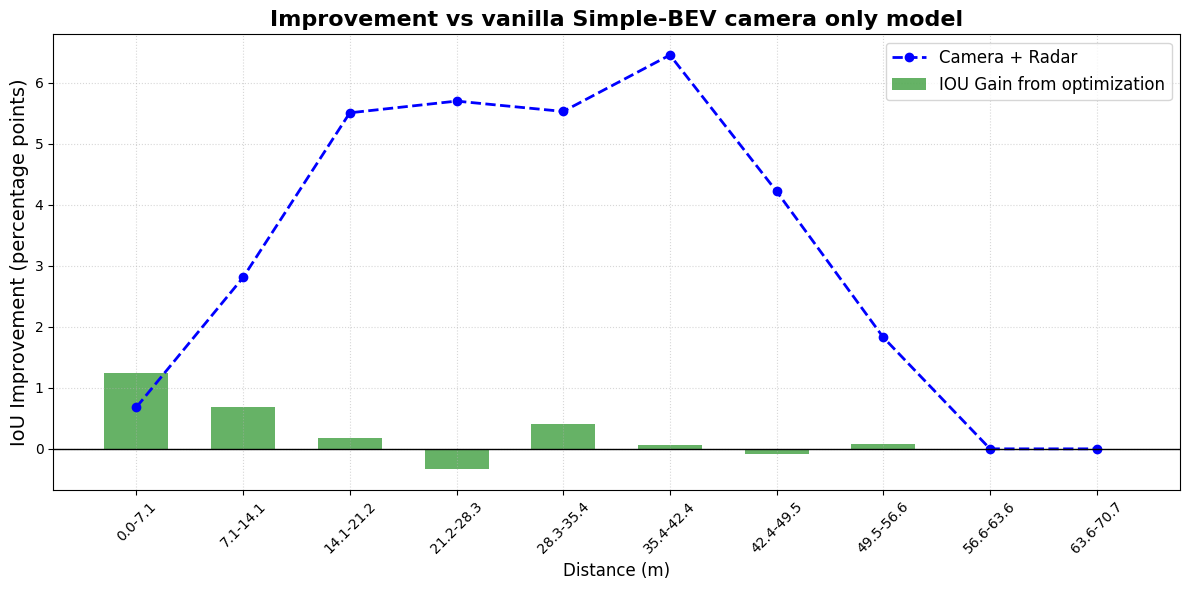

mean IoU:
Baseline Cam only model: 38.44
Optimized Cam only model: 38.66
Baselinem model + Radar: 41.71


In [9]:
import matplotlib.pyplot as plt
import numpy as np

y_cam_orig = np.load('results_cam_baseline.npy')
y_radar = np.load('results_radar_baseline.npy')
y_cam_imp = np.load('results_cam_optimized.npy')

delta_imp = y_cam_imp - y_cam_orig
delta_radar = y_radar - y_cam_orig

max_dist = np.sqrt(50**2 + 50**2)
num_bins = 10
bin_size = max_dist/num_bins
distances = [f"{i*bin_size:.1f}-{(i+1)*bin_size:.1f}" for i in range(num_bins)]
x = np.arange(len(distances))

plt.figure(figsize=(12, 6))

bars = plt.bar(x, delta_imp, color='green', alpha=0.6, label='IOU Gain from optimization', width=0.6)
plt.plot(x, delta_radar, color='blue', marker='o', linestyle='--', linewidth=2, label='Camera + Radar')
plt.axhline(0, color='black', linewidth=1)

plt.title('Improvement vs vanilla Simple-BEV camera only model', fontsize=16, fontweight='bold')
plt.ylabel('IoU Improvement (percentage points)', fontsize=14)
plt.xlabel('Distance (m)', fontsize=12)
plt.xticks(x, distances, rotation=45, fontsize=10)
plt.legend(fontsize=12)
plt.grid(True, linestyle=':', alpha=0.5)

plt.tight_layout()
plt.savefig('final_gain_chart.png', dpi=300)
plt.show()

print("mean IoU:")
print(f"Baseline Cam only model: {np.mean(y_cam_orig):.2f}")
print(f"Optimized Cam only model: {np.mean(y_cam_imp):.2f}")
print(f"Baselinem model + Radar: {np.mean(y_radar):.2f}")